In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=1000)

def one_hot_sequence(sequences, dimension=1000):
    results = np.zeros((len(sequences), dimension))
    for i, word_index in enumerate(sequences):
        results[i, word_index] = 1.
    return results

train_data = one_hot_sequence(train_data)
test_data = one_hot_sequence(test_data)

In [2]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_data,
                   train_labels,
                   epochs=20,
                   batch_size=512,
                   validation_data=(test_data, test_labels),
                   verbose=2)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing t

In [12]:
#graph 출력

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc) + 1)

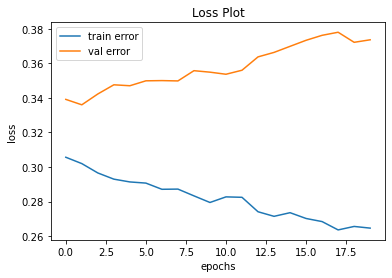

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()

## overfitting(과잉적합) 방지 - regulairzer 적용

In [5]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, kernel_regularizer = tf.keras.regularizers.l2(0.001), activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dense(16, kernel_regularizer = tf.keras.regularizers.l2(0.001), activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

## overfitting(과잉적합) 방지 - Dropout 적용

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1000,)))

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(16, activation='relu'))

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [3]:
import keras
keras.__version__

ERROR! Session/line number was not unique in database. History logging moved to new session 62


Using TensorFlow backend.


'2.3.1'